In [1]:
import numpy as np
import pandas as pd
from ucimlrepo import fetch_ucirepo

import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Pandas dataframe view configuration
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns', None)

import time
import datetime as dt


### Dataset Information

The dataset used in this analysis can be downloaded directly from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/352/online+retail) or imported directly as shown in this notebook. For more details, visit the [original repository](https://github.com/uci-ml-repo/ucimlrepo).

**Citation:**
Chen, Daqing. (2015). *Online Retail*. UCI Machine Learning Repository. [https://doi.org/10.24432/C5BW33](https://doi.org/10.24432/C5BW33).


In [2]:
# fetch dataset 
online_retail = fetch_ucirepo(id=352) 
  
# metadata 
print(online_retail.metadata) 
  
# variable information 
print(online_retail.variables) 


{'uci_id': 352, 'name': 'Online Retail', 'repository_url': 'https://archive.ics.uci.edu/dataset/352/online+retail', 'data_url': 'https://archive.ics.uci.edu/static/public/352/data.csv', 'abstract': 'This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.', 'area': 'Business', 'tasks': ['Classification', 'Clustering'], 'characteristics': ['Multivariate', 'Sequential', 'Time-Series'], 'num_instances': 541909, 'num_features': 6, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': None, 'index_col': ['InvoiceNo', 'StockCode'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2015, 'last_updated': 'Fri Jan 05 2024', 'dataset_doi': '10.24432/C5BW33', 'creators': ['Daqing Chen'], 'intro_paper': {'title': 'Data mining for the online retail industry: A case study of RFM model-based customer segmentation using data mining', 'aut

In [3]:
online_retail.data.targets 

In [4]:
online_retail.data.headers

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

Since the 'original' key contains a DataFrame that includes the complete original dataset consisting of all IDs, features, this is the most comprehensive view of the dataset. The columns here include:
InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country.

In [5]:
data = online_retail.data['original']

data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.00,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.00,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.00,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.00,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.00,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.00,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.00,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.00,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.00,France


In [6]:
#Overview of datatypes 
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None


In [7]:
#Statistical view of the data
print(data.describe())

       Quantity  UnitPrice  CustomerID
count 541909.00  541909.00   406829.00
mean       9.55       4.61    15287.69
std      218.08      96.76     1713.60
min   -80995.00  -11062.06    12346.00
25%        1.00       1.25    13953.00
50%        3.00       2.08    15152.00
75%       10.00       4.13    16791.00
max    80995.00   38970.00    18287.00


In [8]:
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")


Number of duplicate rows: 5268


In [9]:
#Dropping the duplicates
data = data[~data.duplicated()]

In [10]:
#Missing values
mis_val = data.isnull().sum()

#Percentage of missing values
mis_val_percent = 100 * data.isnull().sum() / len(data)        

mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)        
mis_val_table = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})        

mis_val_table

,Missing Values,% of Total Values
InvoiceNo,0,0.00
StockCode,0,0.00
Description,1454,0.27
Quantity,0,0.00
InvoiceDate,0,0.00
UnitPrice,0,0.00
CustomerID,135037,25.16
Country,0,0.00


Two columns in the dataset have missing values: *Description* and *CustomerID*, with 0.27% and 25.16% of the total records affected, respectively. Given that approximately 25% of the records lack a customer ID, these records are not useful for Cohort Analysis. However, one can further investigate whether any records share the same invoice number but differ in their customer ID status. Then, one could potentially fill in the missing customer IDs, thereby reducing data loss.

In [11]:
#unique InvoiceNo with null CustomerID records
Invoice_list = data[data.CustomerID.isnull()]['InvoiceNo'].tolist()

#Number of records with these InvoiceNo
len(data[data.InvoiceNo.isin(Invoice_list)])    

135037

Since the count of the Invoice with null customerID is equivalent to the number of records with missing CustomerID, it's not possible to prevent the loss and it's better to remove all such records before any further analysis. For the *Description* missing values, since this is not an essencial column for Cohort Analysis, they will be replace for an "Unknown" description. 

In [12]:
#Replace unknown in empty descriptions
data['Description'].fillna('Unknown', inplace=True)

#Clean the rows with missing CustomerId
data_cleaned = data.dropna(subset=['CustomerID'])

data_cleaned.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In the metadata the description of InvoiceNo says *InvoiceNo: Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.* Therefore, it's necessary to check for that data and store it in other dataset for the analysis. 

In [13]:
cancelled_trans = data_cleaned.InvoiceNo.str.contains('C', na=False).sum()

cancelled_trans

8872

In [15]:
data_cleaned = data_cleaned[~data_cleaned.InvoiceNo.str.contains('C', na=False)]
len(data_cleaned)

392732

## Exploratoy Data Analysis 

In [18]:
#Transform datatypes as neceessary
data_cleaned['InvoiceDate'] = pd.to_datetime(data_cleaned['InvoiceDate'])

In [19]:
#Checking after the cleaning what is the temporal distribution
print(f'Oldest date is - {data_cleaned.InvoiceDate.min()}\n')
print(f'Latest date is - {data_cleaned.InvoiceDate.max()}')

Oldest date is - 2010-12-01 08:26:00

Latest date is - 2011-12-09 12:50:00


Since 2010 only includes transactions done in December, therefore it will be evident that most of the records belong to 2011.

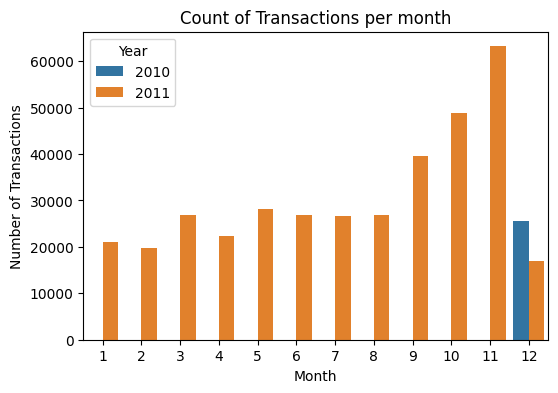

In [24]:
data_cleaned['Year'] = data_cleaned['InvoiceDate'].dt.year
data_cleaned['Month'] = data_cleaned['InvoiceDate'].dt.month

plt.figure(figsize=(6,4))
sns.countplot(x='Month', hue='Year', data=data_cleaned, order=range(1, 13))
plt.title('Count of Transactions per month')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=0)
plt.legend(title='Year')
plt.show()

An increasing trend can be observed month by month, with a notable decline in December. This drop is expected, as only the first 8–9 days of December 2011 are included in the dataset, meaning that around 70% of the month's transactions are missing. Considering this, the sales figures appear reasonable and consistent with the available data.

In [25]:
#top ten countries in the dataset with highest transactions
data_cleaned.Country.value_counts(normalize=True).head(10).mul(100).round(1).astype(str) + '%'


United Kingdom    88.9%
Germany            2.3%
France             2.1%
EIRE               1.8%
Spain              0.6%
Netherlands        0.6%
Belgium            0.5%
Switzerland        0.5%
Portugal           0.4%
Australia          0.3%
Name: Country, dtype: object

Almost 90% of records belong to sales done in the United Kingdom.

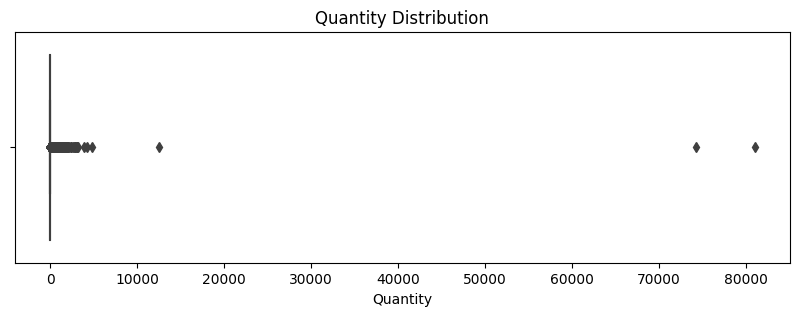

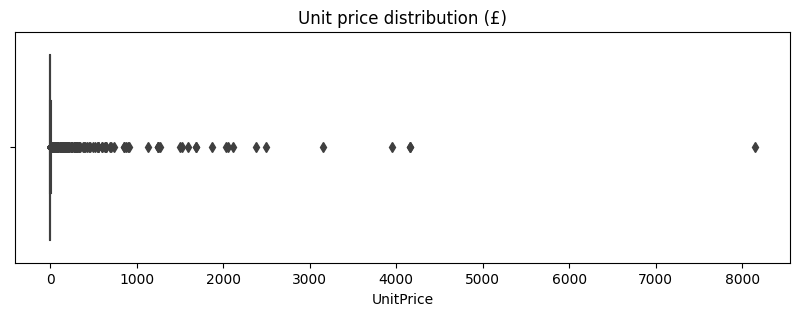

In [44]:
#Quantity distribution
plt.figure(figsize=(10,3))
sns.boxplot(x='Quantity', data=data_cleaned, orient='h')
plt.title('Quantity Distribution')
plt.show()

#Unit price distribution
plt.figure(figsize=(10,3))
sns.boxplot(x='UnitPrice', data=data_cleaned, orient='h')
plt.title('Unit price distribution (£)')
plt.show()


This indicates that both the Quantity and Unit Price data are highly skewed toward lower values, with a few outliers present. These outliers could be due to data entry errors or genuine large orders.

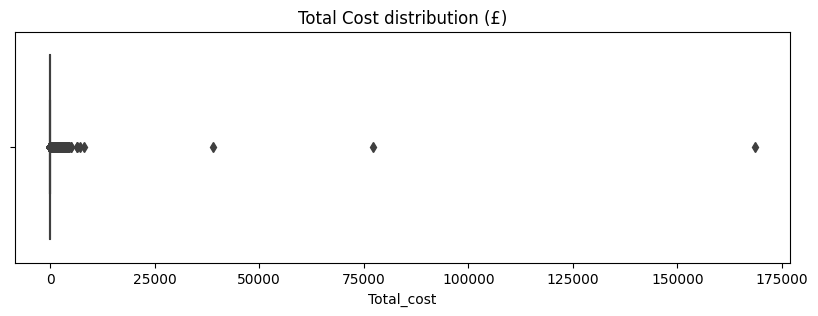

In [45]:
#feature with total cost of the transactions
data_cleaned['Total_cost'] = data_cleaned.Quantity * data_cleaned.UnitPrice

#Total cost distribution
plt.figure(figsize=(10,3))
sns.boxplot(x='Total_cost', data=data_cleaned, orient='h')
plt.title('Total Cost distribution (£)')
plt.show()


Similar to the Unit Price values, the calculated Total Costs seem to be highly skeweed for total prices under £12500.

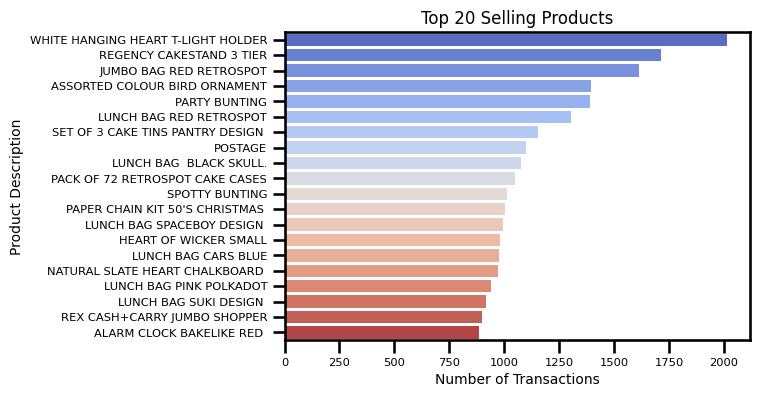

In [52]:
#Visualization of some top products from the whole range
top_products = data_cleaned['Description'].value_counts().head(20)

plt.figure(figsize=(6,4))  
sns.set_context("talk", font_scale=0.5)  
sns.barplot(y=top_products.index, x=top_products.values, palette="coolwarm")
plt.title("Top 20 Selling Products", fontsize=12)
plt.xlabel("Number of Transactions", fontsize=10)
plt.ylabel("Product Description", fontsize=10)
plt.show()

The most frequently sold products vary significantly in their transaction counts, ranging from around 800 to 2000 transactions. This range highlights the disparity in sales volume among top products, with a few items dominating the sales figures.

In [53]:
#Save the cleaned data set to work on ongoing Cohort Analysis
data_cleaned.to_csv('data_cleaned.csv', index=False)